# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# Preprocessing numerical data

### Create data

In [12]:
nPts= 1000

a = np.random.normal( 1, 0.5, nPts)
b = np.random.normal(-1, 0.25, nPts) + a*2
X = np.array([a,b]).T

df_X = pd.DataFrame(X)
df_X

,0,1
0,1.379795,2.061647
1,0.804198,0.299519
2,0.799705,0.861128
3,1.553415,1.879004
4,0.797103,0.654313
...,...,...
995,2.244560,3.413660
996,0.774883,0.295796
997,1.149222,1.256455
998,1.581305,1.544629


,count,mean,std,min,25%,50%,75%,max
0,1000.0,0.986399,0.503816,-1.195119,0.644535,0.996260,1.331994,2.468052
1,1000.0,0.977391,1.035921,-3.332914,0.264690,0.992398,1.675226,4.304776


,0,1
0,1.000000,0.970134
1,0.970134,1.000000


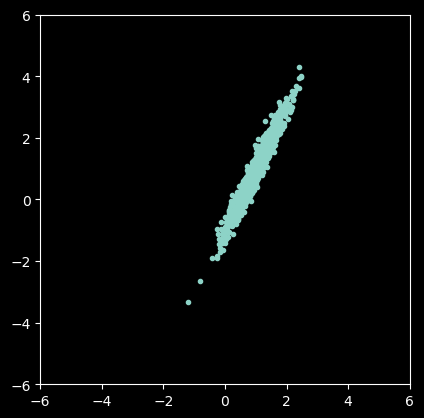

In [13]:
display(df_X.describe().T)
display(df_X.corr())

plt.plot( X[:,0], X[:,1], '.' )
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.gca().set_aspect('equal')

### Standard scaler (convert to z-score: mean=0, std=1)

,count,mean,std,min,25%,50%,75%,max
0,1000.0,7.993606e-17,1.0005,-4.332156,-0.678888,0.019582,0.686298,2.942333
1,1000.0,-3.552714e-18,1.0005,-4.162925,-0.688332,0.014494,0.673975,3.213614


,0,1
0,1.000000,0.970134
1,0.970134,1.000000


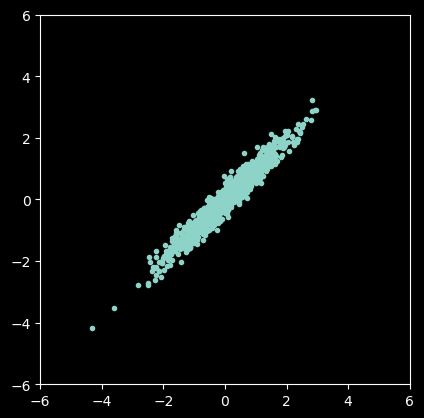

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1 = scaler.fit_transform(X)

df_X1 = pd.DataFrame(X1)
display(df_X1.describe().T)
display(df_X1.corr())

plt.plot( X1[:,0], X1[:,1], '.' )
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.gca().set_aspect('equal')

### Min max scaler (scale values to between 0 - 1)

,count,mean,std,min,25%,50%,75%,max
0,1000.0,0.527044,0.176621,0.0,0.409776,0.526206,0.644771,1.0
1,1000.0,0.523830,0.165548,0.0,0.415095,0.520521,0.633375,1.0


,0,1
0,1.000000,0.972249
1,0.972249,1.000000


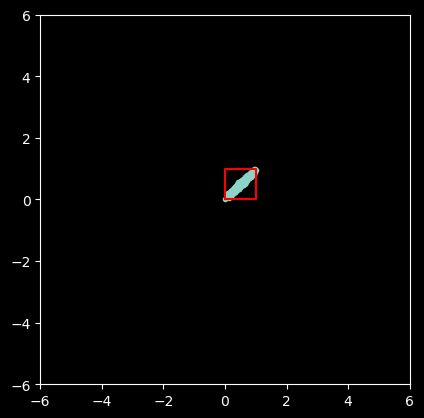

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X2 = scaler.fit_transform(X)

df_X2 = pd.DataFrame(X2)
display(df_X2.describe().T)
display(df_X2.corr())

plt.plot( X2[:,0], X2[:,1], '.' )
plt.plot( [0,1,1,0,0], [0,0,1,1,0], 'r' )
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.gca().set_aspect('equal')

### PCA (principoal component analysis)

,count,mean,std,min,25%,50%,75%,max
0,1000.0,-4.263256e-17,1.187339,-3.732625,-0.795139,-0.034416,0.779724,3.325297
1,1000.0,1.278977e-16,0.110066,-0.387655,-0.073798,0.000745,0.074745,0.360792


,0,1
0,1.000000e+00,1.511162e-15
1,1.511162e-15,1.000000e+00


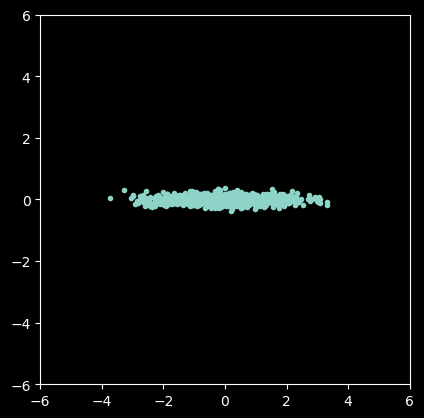

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X3 = pca.fit_transform(X)

df_X3 = pd.DataFrame(X3)
display(df_X3.describe().T)
display(df_X3.corr())

plt.plot( X3[:,0], X3[:,1], '.' )
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.gca().set_aspect('equal')

### Binarizer (convert values to binary based on a threshold)

In [10]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.5)

X4 = binarizer.fit_transform(X2)

print(X2[:4,:])
print(X4[:4,:])

[[0.25617117 0.30507337]
 [0.50092521 0.50960887]
 [0.35725264 0.36392701]
 [0.5394518  0.54113783]]
[[0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]]


# Preprocessing categorical data

### Create data

In [38]:
# note that this is a 1-d array
text = np.array( ['cat', 'dog', 'bird', 'cat'] )

### label encoder

In [35]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
text_LE = LE.fit_transform(text)
text_LE

array([1, 2, 0, 1], dtype=int64)

In [36]:
LE.classes_

array(['bird', 'cat', 'dog'], dtype='<U4')

In [37]:
LE.inverse_transform(text_LE)

array(['cat', 'dog', 'bird', 'cat'], dtype='<U4')

### one hot encoder

In [39]:
# note that this is a 2-d array
text2 = text[:,np.newaxis]
text2

array([['cat'],
       ['dog'],
       ['bird'],
       ['cat']], dtype='<U4')

In [40]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder(sparse=False)
text2_OHE = OHE.fit_transform(text2)

text2_OHE

C:\Users\Graham West\anaconda3\envs\csci4900\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [42]:
print(OHE.categories_)

[array(['bird', 'cat', 'dog'], dtype='<U4')]
